In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Mihai\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Filter for Romanian Data Analyst roles

In [2]:
df_DA_RO = df[(df['job_country'] == 'Romania') & (df['job_title_short'] == 'Data Analyst')]

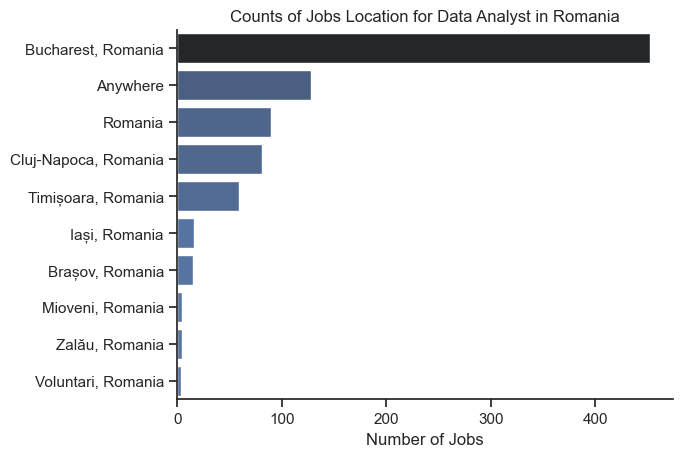

In [12]:
df_plot = df_DA_RO['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x ='count',y='job_location', hue='count',palette='dark:b_r',legend = False)
sns.despine()
plt.title('Counts of Jobs Location for Data Analyst in Romania')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

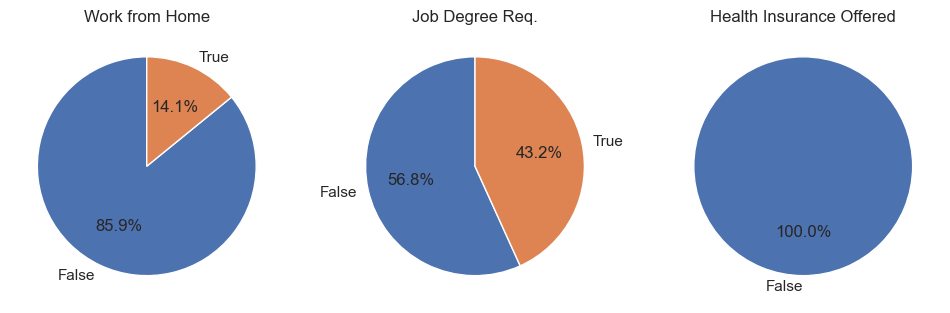

In [25]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i,(column,title) in enumerate(dict_column.items()):
    value_counts = df_DA_RO[column].value_counts()
    ax[i].pie(value_counts, startangle=90, autopct='%1.1f%%', labels=value_counts.index.astype(str).tolist())
    ax[i].set_title(title)

fig.set_size_inches((12,5))

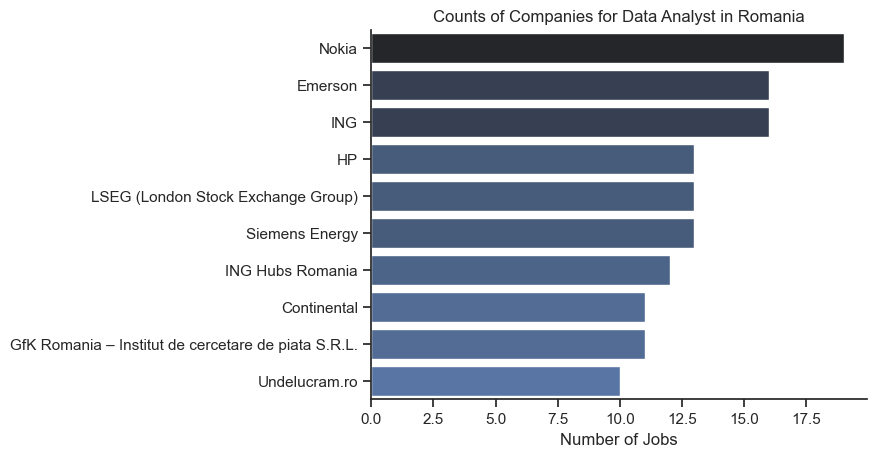

In [26]:
df_plot = df_DA_RO['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x ='count',y='company_name', hue='count',palette='dark:b_r',legend = False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in Romania')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()